In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
%matplotlib widget

# Covariance Matrix as white noise
$\Sigma_w = \begin{bmatrix} 
1 & 0 \\
0 & 1
\end{bmatrix}$

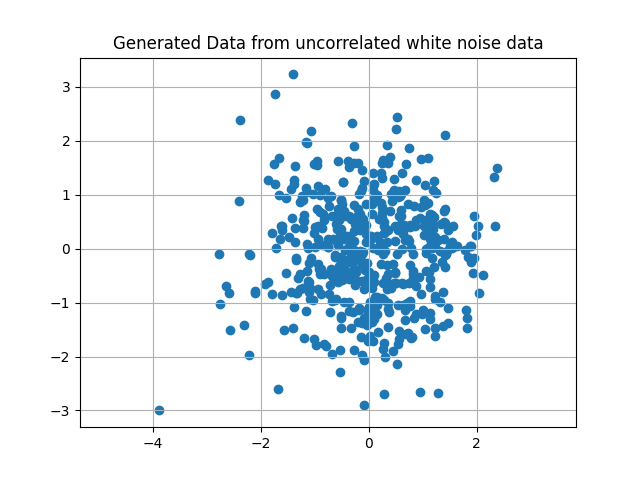

In [3]:
X = np.random.normal(0, 1, 500)
Y = np.random.normal(0, 1, 500)
plt.figure()
plt.grid()
plt.title('Generated Data from uncorrelated white noise data')
plt.axis('equal');
plt.scatter(X,Y)

# Eigen Decomposition
$\Sigma v = \lambda v$

where,
$\lambda$ is the eigen value

$v$ is the eigen vector

In [4]:
w, v = np.linalg.eig(np.identity(2))
print(w)
print(v)

[1. 1.]
[[1. 0.]
 [0. 1.]]


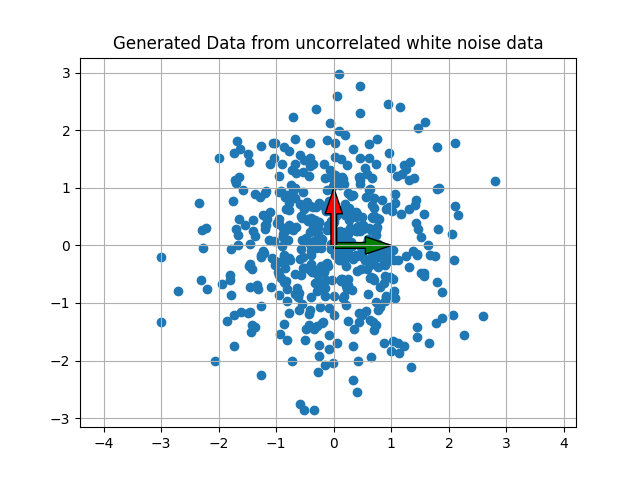

In [5]:
X = np.random.normal(0, 1, 500)
Y = np.random.normal(0, 1, 500)
plt.figure()
plt.grid()
plt.title('Generated Data from uncorrelated white noise data')
plt.axis('equal');
plt.scatter(X,Y)
plt.arrow(0 , 0, w[0] * v[0,0], w[0] * v[1,0], width = 0.1, fc='g', length_includes_head=True)
plt.arrow(0 , 0, w[1] * v[0,1], w[1] * v[1,1], width = 0.1, fc='r', length_includes_head=True)

### Scaling of Covariance Matrix
Suppose we scale the covariance matrix across Y

$ \Sigma_s = \begin{bmatrix}
s_x & 0 \\
0 & s_y
\end{bmatrix} \times \Sigma_w $

Let, $s_x = 1$ and $s_y = 16$

$\Sigma_s = \begin{bmatrix}
1 & 0 \\
0 & 16
\end{bmatrix} = \begin{bmatrix}
\sigma_x^2 & 0 \\
0 & \sigma_y^2 \end{bmatrix}$

[ 1. 16.]


(-3.474899382138316,
 3.3083285420065867,
 -15.512260056941578,
 13.310107621759123)

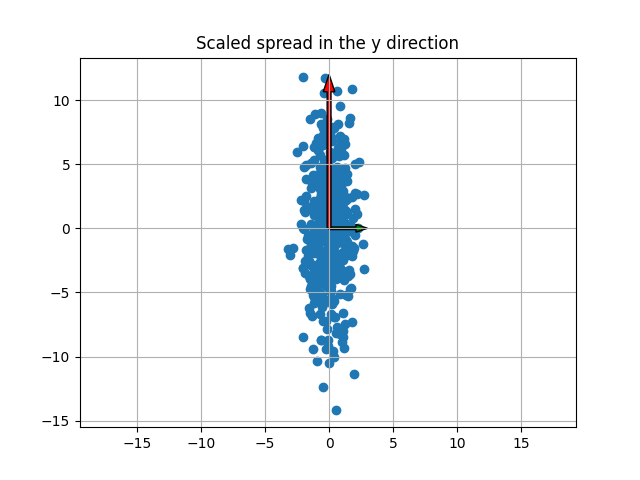

In [6]:
X = np.random.normal(0,1,500)
Y = np.random.normal(0,4,500)

Cov_s = np.array([[1, 0], [0,16]])
w, v = np.linalg.eig(Cov_s)
print(w)

plt.figure()
plt.grid()
plt.scatter(X, Y)
plt.arrow(0, 0, 3 * math.sqrt(w[0]) * v[0,0], 3 * math.sqrt(w[0]) * v[1,0], fc = 'g', width = 0.2, length_includes_head=True)
plt.arrow(0, 0, 3 * math.sqrt(w[1]) * v[0,1], 3 * math.sqrt(w[1]) * v[1,1], fc='r', width = 0.3, length_includes_head=True)
plt.title('Scaled spread in the y direction')
plt.axis('equal')

## Axis Aligned (non-correlated) data
For Axis Aligned data, the variance is equivalent to eigen values

$\lambda_j$ = $\sigma_j^2$  

Eigen Vectors (unit vector) are along the axes directions X & Y

## But What happens when the data is correlated?
Let, 
$\mu = \begin{bmatrix}
0 \\
0
\end{bmatrix}$

$\Sigma = \begin{bmatrix}
4 & 3 \\
3 & 9
\end{bmatrix}$

Drawing from a multivariate normal distribution

[ 2.59487516 10.40512484]
[[-0.90558942 -0.4241554 ]
 [ 0.4241554  -0.90558942]]


(-5.709979574550851, 6.273529438241104, -9.920094983700789, 10.137025880936523)

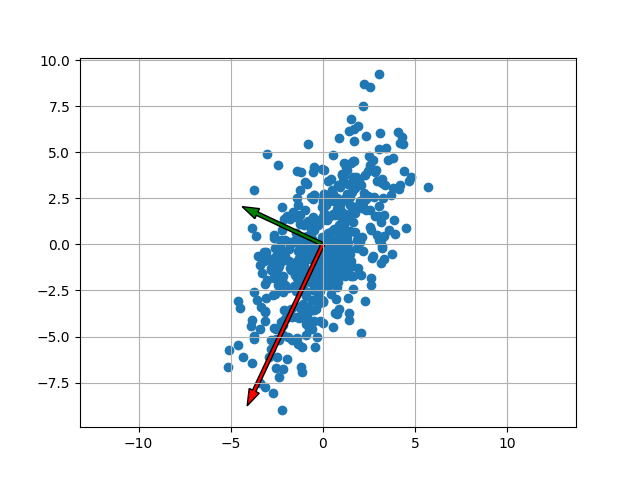

In [7]:
mu = np.zeros(2)
sigma = np.array([[4, 3], [3, 9]])
XY = np.random.multivariate_normal(mu, sigma, 500)

w, v = np.linalg.eig(sigma)
print(w)
print(v)
plt.figure()
plt.grid()
plt.scatter(XY[:,0], XY[:,1])
plt.arrow(0, 0, 3 * math.sqrt(w[0]) * v[0,0], 3 * math.sqrt(w[0]) * v[1,0], fc = 'g', width = 0.2, length_includes_head=True)
plt.arrow(0, 0, 3 * math.sqrt(w[1]) * v[0,1], 3 * math.sqrt(w[1]) * v[1,1], fc='r', width = 0.2, length_includes_head=True)
plt.axis('equal')

## Non-axis aligned (correlated) data
Eigen values represent the magnitude of spread along the eigen vector direction

Variance Components in the covariance matrix represent the magnitude of spread along the global X and Y axes

Zero Covariance means Variance Components and Eigen Values will be equivalent

Eigen Vectors are always going to be orthonormal for a symmetric matrix

## Covariance as Rotation and Scaling
Let, $T = RS$

We know,

$\Sigma v = \lambda v$

For All Eigen values and Eigen Vectors,

$\Sigma V = V \Lambda$

where,

$V$ is the Matrix representing the eigen vectors on its columns
$\Lambda$ is the diagonal matrix with the corresponding eigen values for the eigen vectors

**Remember that returned eigen vectors and  weights are consistent or aligned with the original covariance matrix**

Therefore,

$\Sigma = V \Lambda V^{-1}$ is the Eigen Decomposition, 
Since the eigen vectors are orthonormal for Cov Matrix, it is also called as the spectral decomposition

Also, since the eigen vectors are orthonormal, they form a orthonormal basis. Hence, satisfy the properties for a Rotation Matrix
$\Sigma = R S (S R)^{-1} $

where,
$R = V$

$S = \sqrt{\Lambda}$

Also, 
$S^{-1} = S$

$R^{-1} = R^{T}$

Hence,
$\Sigma = RSSR^T  =  T T ^T$ and,

$\Sigma = RSSR^T \times \Sigma_w$

So, we can get whatever Covariance Matrix of our choice by using the appropriate scaling

## Recover underlying scale and rotation
The underlying eigen decomposition can be leveraged,

In a way it separates the covariance matrix as Rotation and Scale

$\theta = \tan^{-1} \frac{V(1,0)}{V(0,0)}$

$ S_x = \sqrt{\Lambda(0,0)}$;

$ S_y = \sqrt{\Lambda(1,1)}$

The orientation of Ellipse is: 25.097214453867405
The value of sigma obtained after combination of decomposition is: [[9. 3.]
 [3. 4.]]


(-9.1087613072372, 12.305160419117872, -8.33218643646134, 8.52837253676476)

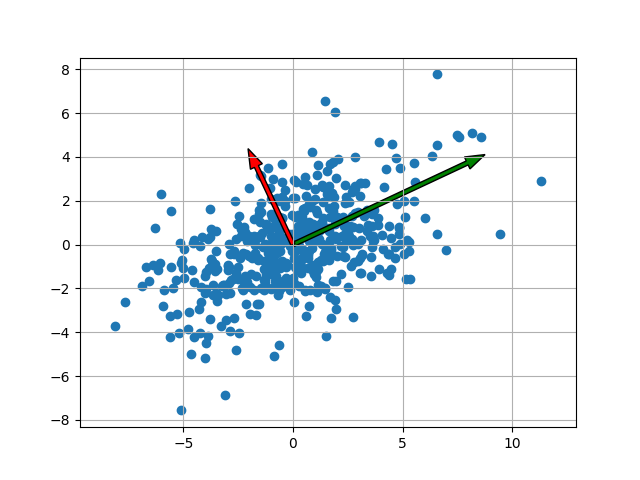

In [8]:
mu = np.zeros(2)
sigma = np.array([[9, 3], [3, 4]])

w, v = np.linalg.eig(sigma)

theta = math.atan2(v[1,0], v[0,0])
scales = (math.sqrt(w[0]), math.sqrt(w[1]))

print(f'The orientation of Ellipse is: {theta * 180 / math.pi}')

R = np.array([[math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]])

S = np.array([[scales[0], 0], [0, scales[1]]])

sigma_rot = R @ S @ S @ R.T
print(f'The value of sigma obtained after combination of decomposition is: {sigma_rot}')

# Using the one from above cell for the sake of comparison
XY = np.random.multivariate_normal(mu, sigma_rot, 500)

w, v = np.linalg.eig(sigma)

plt.figure()
plt.grid()
plt.scatter(XY[:,0], XY[:,1])
plt.arrow(0, 0, 3 * scales[0] * v[0,0], 3 * scales[0] * v[1,0], fc = 'g', width = 0.2, length_includes_head=True)
plt.arrow(0, 0, 3 * scales[1] * v[0,1], 3 * scales[1] * v[1,1], fc='r', width = 0.2, length_includes_head=True)
plt.axis('equal')

### Knowing Rotation also allows us to remove correlation within the data
All we need to do is use the rotation matrix to transform the points

For getting the covariance matrix with zero covariance,
$ \Sigma_{uncorrelated} = R^T \times \Sigma \times R$

This is also called as the Similarity Transform

In [9]:
sigma_uncorr = R.T @ sigma_rot @ R
print(sigma_uncorr)
sigma_corr = R @ sigma_uncorr @ R.T
print(sigma_corr)

[[ 1.04051248e+01 -6.00232021e-16]
 [ 1.41366865e-16  2.59487516e+00]]
[[9. 3.]
 [3. 4.]]


## Drawing Error Elllipse
Strictly speaking the $3 \times \sigma$ approach does not give the accurate 99.7% interpretation of underlying data

It is a good ballpark number to draw our error ellipse and it can be treated as an upper bound

Equation of Ellipse aligned with the axes and centered at origin is given by:

$ \frac{x^2}{a^2} + \frac{y^2}{b^2} = 1$ 

where, 
$a$ = $\frac{1}{2}$ times major axis;

$b$ = $\frac{1}{2}$ times minor axis

It can also be expressed as a locus of points given by:

$x = a cos(\phi)$;

$y = b cos(\phi)$

Where $\phi$ is the angle of the line connecting the point on the ellipse to the center of ellipse with the X-axis

To Draw a error ellipse for any covariance matrix, we simply need to find out major and minor axes and rotate the points based on the $\theta$ value

Text(0.5, 1.0, 'Correlated Data with Ellipse')

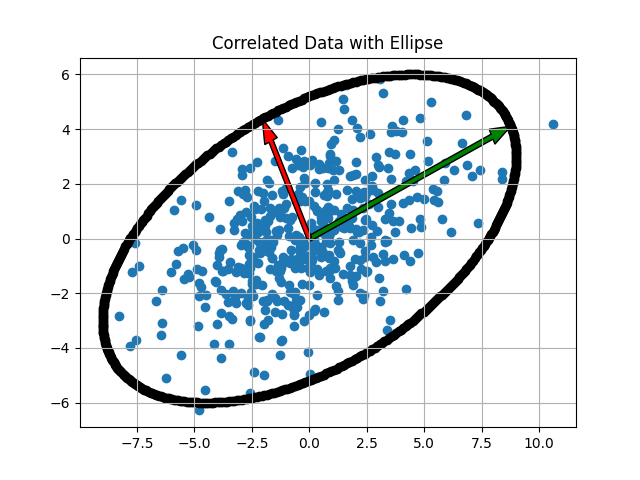

In [10]:
mu = np.zeros(2)
sigma = np.array([[9, 3], [3, 4]])
w, v = np.linalg.eig(sigma)

dom = np.linspace(-math.pi, math.pi, 500, endpoint=True)

X = list()
Y = list()

a = 3 * math.sqrt(w[0])
b = 3 * math.sqrt(w[1])

for p in dom:
    X.append(a * math.cos(p))
    Y.append(b * math.sin(p))
    
axes_aligned_points = np.vstack((np.array(X), np.array(Y)))

theta = math.atan2(v[1,0], v[0,0])

R = np.array([[math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]])

transformed_points = R @ axes_aligned_points

XY = np.random.multivariate_normal(mu, sigma, 500)
plt.figure()
plt.grid()
plt.scatter(XY[:,0], XY[:,1])
plt.arrow(0, 0, a * v[0,0], a * v[1,0], fc = 'g', width = 0.2, length_includes_head=True)
plt.arrow(0, 0, b * v[0,1], b * v[1,1], fc='r', width = 0.2, length_includes_head=True)
plt.scatter(transformed_points[0,:], transformed_points[1,:], color='k')
plt.title("Correlated Data with Ellipse")

## Improving Bounds of Covariance Error Ellipse
Individual X and Y are normally distributed, but the sum of squares of their distribution follows a Chi(squared) distribution.

The ellipse underlying that distribution can be represnted as
$ \frac{x^2}{\sigma_x^2} + \frac{y^2}{\sigma_y^2} = s$ 

where,

$s$ = 5.991 for 95% of data

$s$ = 9.210 for 99% of data

$s$ = 4.605 for 90% of data 

Therefore, all we have to do is modify our ellipse equation params $a$ and $b$ as:

$a =\sqrt{s \times w_x}$;

$b = \sqrt{s \times w_y}$

Text(0.5, 1.0, 'Correlated Data with Ch-Squared Ellipse')

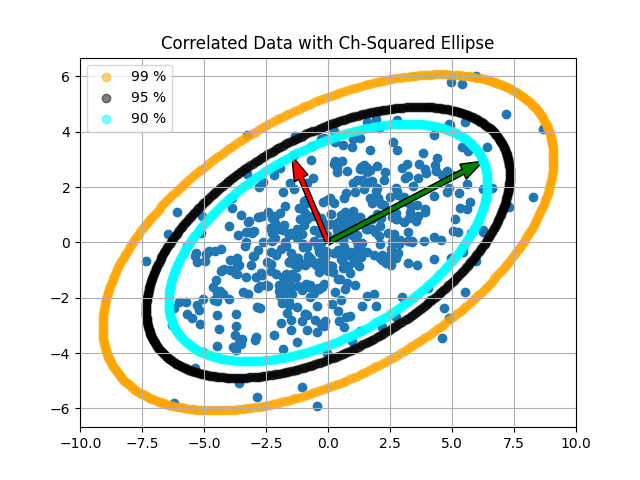

In [11]:
mu = np.zeros(2)
sigma = np.array([[9, 3], [3, 4]])
w, v = np.linalg.eig(sigma)

dom = np.linspace(-math.pi, math.pi, 500, endpoint=True)

bound_map = {'99':9.210, '95':5.991, '90':4.605}
color_map = {'99':'orange', '95':'black', '90':'cyan'}
axes_aligned_points_bounds = dict()

for bound, s in bound_map.items():
    X = list()
    Y = list()
    a = math.sqrt(s) * math.sqrt(w[0])
    b = math.sqrt(s) * math.sqrt(w[1])
    for p in dom:
        X.append(a * math.cos(p))
        Y.append(b * math.sin(p))

    axes_aligned_points_bounds[bound] = np.vstack((np.array(X), np.array(Y)))

theta = math.atan2(v[1,0], v[0,0])

R = np.array([[math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]])

XY = np.random.multivariate_normal(mu, sigma, 500)
fig, ax = plt.subplots()
plt.grid()
ax.scatter(XY[:,0], XY[:,1])
ax.arrow(0, 0, a * v[0,0], a * v[1,0], fc = 'g', width = 0.2, length_includes_head=True)
ax.arrow(0, 0, b * v[0,1], b * v[1,1], fc='r', width = 0.2, length_includes_head=True)

for bound, axes_aligned_points in axes_aligned_points_bounds.items():
    transformed_points = R @ axes_aligned_points
    ax.scatter(transformed_points[0,:], transformed_points[1,:], label=bound + ' %', c=color_map[bound], alpha = 0.5)
    
plt.legend()
plt.title("Correlated Data with Ch-Squared Ellipse")

## Conclusion
* We saw that the bounds of covariance ellipse can be improved by using a Chi Squared distribution
* Usually, we are still concerned with 1 $\sigma$, 2 $\sigma$ and 3 $\sigma$ ellipses. Even though they don't represent the actual 68-95-99.7 of data
* We can get away with this representation as typically real world data is not gaussian
* For all practical purposes, we would still be using 1 $\sigma$, 2 $\sigma$ and 3 $\sigma$ ellipses

In [12]:
def draw_error_ellipse(ax, mu, sigma, sigma_bounds=[1,2,3], show_points=False):
    w, v = np.linalg.eig(sigma)

    dom = np.linspace(-math.pi, math.pi, 500, endpoint=True)

    axes_aligned_points_bounds = dict()

    for bound in sigma_bounds:
        X = list()
        Y = list()
        a = bound * math.sqrt(w[0])
        b = bound * math.sqrt(w[1])
        for p in dom:
            X.append(a * math.cos(p))
            Y.append(b * math.sin(p))

        axes_aligned_points_bounds[bound] = np.vstack((np.array(X), np.array(Y)))

    theta = math.atan2(v[1,0], v[0,0])

    R = np.array([[math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]])

    if show_points:
        XY = np.random.multivariate_normal(mu, sigma, 500)
        ax.scatter(XY[:,0], XY[:,1], alpha = 0.1)
        
    ax.arrow(0, 0, v[0,0], v[1,0], fc = 'g', width = 0.02, length_includes_head=True)
    ax.arrow(0, 0, v[0,1], v[1,1], fc='r', width = 0.02, length_includes_head=True)

    for bound, axes_aligned_points in axes_aligned_points_bounds.items():
        transformed_points = R @ axes_aligned_points
        ax.scatter(transformed_points[0,:], transformed_points[1,:], c='k', alpha = 0.5)

(-9.89995172743879, 9.899950164009518, -6.599992539414745, 6.599912223707434)

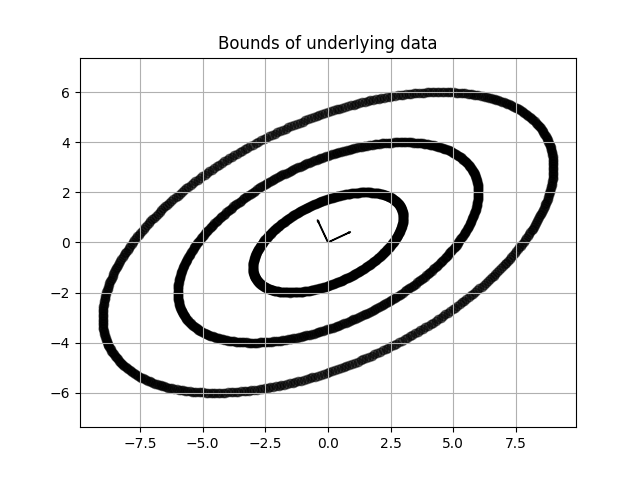

In [13]:
mu = np.zeros((2,1))
sigma = np.array([[9, 3], [3, 4]])
fig, ax = plt.subplots()
plt.grid()
draw_error_ellipse(ax, mu, sigma)
plt.title("Bounds of underlying data")
plt.axis('equal')

[[0.12246999 0.        ]
 [0.         0.12246999]]


(-1.154857475284713,
 1.1548366685792266,
 -1.1548527937618036,
 1.1548527937618036)

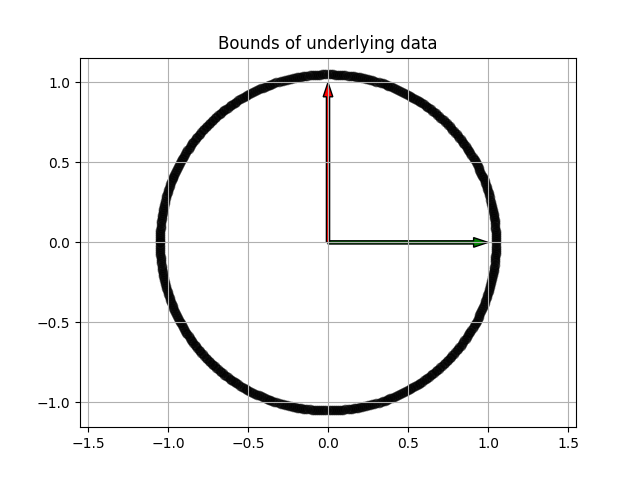

In [14]:
mu = np.zeros((2,1))
sigma = np.array([[0.12246999, 0], [0, 0.12246999]])
print(sigma)
fig, ax = plt.subplots()
plt.grid()
draw_error_ellipse(ax, mu, sigma, sigma_bounds=[3])
plt.title("Bounds of underlying data")
plt.axis('equal')